# Online Retails Purchase

### Introduction:



### Step 1. Import the necessary libraries

In [267]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
plt.style.use('seaborn')

#normal charts inside notebooks
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv). 

### Step 3. Assign it to a variable called online_rt
Note: if you receive a utf-8 decode error, set `encoding = 'latin1'` in `pd.read_csv()`.

In [158]:
url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv"
online_rt = pd.read_csv(url, encoding = 'latin1')
online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


### Step 4. Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK

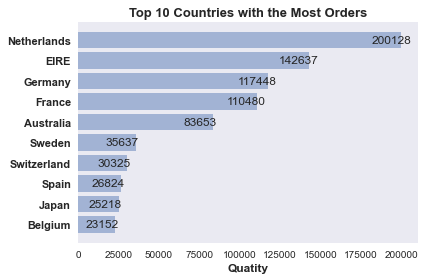

In [159]:
# # create a UK filter
# filt = online_rt["Country"] == "United Kingdom"
# #df_no_UK = online_rt.loc[~filt]
# country groups
country_grp = online_rt.groupby(by = ["Country"])
# sum of Quatity by countries
qty = country_grp["Quantity"].sum().reset_index()

#UK filter
filt = qty["Country"] == "United Kingdom"
#no UK, top 10 in Quantity
qt_rank = qty[~filt].nlargest(10, "Quantity").reset_index(drop = True)

# sort values to make largestest quantity show on top of bar chart
qt_rank = qt_rank.sort_values(by = ["Quantity"])


######################
# plot bar chart
country = qt_rank["Country"]
qt = qt_rank["Quantity"]

# horizontal bar
bars = plt.barh(country, qt, alpha = 0.45)

# add values on bars, padding is distance from bars
plt.bar_label(container = bars, labels = qt, padding = -30, fontsize = 12,)

# add title, switch x, y compare to vertical bars
plt.title("Top 10 Countries with the Most Orders", fontsize = 13, fontweight = "bold")
# plt.ylabel("Countries")
plt.xlabel("Quatity", fontsize = 12, fontweight = "bold")

# adjust y axis label 
plt.yticks(fontsize = 11, fontweight = "bold")

plt.tight_layout()
plt.show()

In [160]:
qt_rank.sort_values(by = ["Quantity"])

,Country,Quantity
9,Belgium,23152
8,Japan,25218
7,Spain,26824
6,Switzerland,30325
5,Sweden,35637
4,Australia,83653
3,France,110480
2,Germany,117448
1,EIRE,142637
0,Netherlands,200128


### Step 5.  Exclude negative Quantity entries

In [161]:
# filter of non-negative number in Quantity
positive_filt = online_rt["Quantity"] >= 0
pos_df = online_rt.loc[positive_filt].reset_index(drop = True)
pos_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


### Step 6. Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries (except UK)

In [162]:
# list of top 3 countries except UK
top_3 = [country for country in qt_rank.nlargest(3, "Quantity")["Country"]]


pos_df["qty_per_unitP"] = pos_df["Quantity"]/pos_df["UnitPrice"]

# filter of 3 countries
c1 = pos_df["Country"] == top_3[0]
c2 = pos_df["Country"] == top_3[1]
c3 = pos_df["Country"] == top_3[2]
   

df_c1 = pos_df.loc[c1]
df_c2 = pos_df.loc[c2]
df_c3 = pos_df.loc[c3]

##data for scatter plot
# country 1
price1 = df_c1["qty_per_unitP"]
customer1 = df_c1["CustomerID"]

# country 2
price2 = df_c2["qty_per_unitP"]
customer2 = df_c2["CustomerID"]

# country 3
price1 = df_c3["qty_per_unitP"]
customer1 = df_c3["CustomerID"]



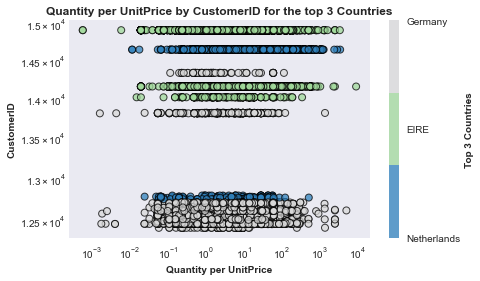

In [163]:
## plot in one plot
# list of top 3 countries except UK
top_3 = [country for country in qt_rank.nlargest(3, "Quantity")["Country"]]


pos_df["qty_per_unitP"] = pos_df["Quantity"]/pos_df["UnitPrice"]

# filter of 3 countries
filt = pos_df["Country"].isin(top_3)
   
plot_df = pos_df.loc[filt].reset_index(drop = True)
plot_df
# turn top 3 country into number 1, 2, 3, 3 is the toppest
country_id = []
for country in plot_df["Country"]:
    if country == top_3[0]:
        country_id.append(1)
    elif country == top_3[1]:
        country_id.append(2)
    else:
        country_id.append(3)

plot_df["country_id"] = country_id

##data for scatter plot
price = plot_df["qty_per_unitP"]
customer = plot_df["CustomerID"]
country = plot_df["country_id"]

###################################
## plot code
# c is color, set colors in a colormap using the country
# color map is tab20c, is a discrete map, 37 color
plt.scatter(price, customer, c = country, cmap = plt.cm.get_cmap("tab20c",3),
           edgecolor = "black", linewidth = 1, alpha = 0.75)



#reference color bar:
# get rid of the warnning on autoremove grid
plt.rcParams['axes.grid'] = False
#set color bar
cbar = plt.colorbar()
cbar.set_label("Top 3 Countries", size = 10, fontweight = "bold")
# set how many number to displace in color map bar
cbar.set_ticks([1,2,3])
# set color map bar labels
cbar.set_ticklabels(top_3)
# set color map bar label size
cbar.ax.tick_params(labelsize = 10)

# use log scale to make outliner less effective
plt.xscale("log")
plt.yscale("log")


plt.title('Quantity per UnitPrice by CustomerID for the top 3 Countries', fontsize = 12, fontweight = "bold")
plt.xlabel('Quantity per UnitPrice', fontsize = 10, fontweight = "bold")
plt.ylabel('CustomerID', fontsize = 10, fontweight = "bold")

#plt.tight_layout()
plt.show()

### Step 7. Investigate why the previous results look so uninformative.

This section might seem a bit tedious to go through. But I've thought of it as some kind of a simulation of problems one might encounter when dealing with data and other people. Besides there is a prize at the end (i.e. Section 8).

(But feel free to jump right ahead into Section 8 if you want; it doesn't require that you finish this section.)

#### Step 7.1 Look at the first line of code in Step 6. And try to figure out if it leads to any kind of problem.
##### Step 7.1.1 Display the first few rows of that DataFrame.

In [164]:
plot_df.head()
# why we want Quantity per UnitPrice anyway? this division 
# doesn't make any sense. Scatter plot it by CustomerID make extra
# no sense because it is just a ID, not a value, you cannot get any
# valuable tendancy with this scatter plot. 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,qty_per_unitP,country_id
0,536403,22867,HAND WARMER BIRD DESIGN,96,12/1/10 11:27,1.85,12791.0,Netherlands,51.891892,1
1,536403,POST,POSTAGE,1,12/1/10 11:27,15.00,12791.0,Netherlands,0.066667,1
2,536527,22809,SET OF 6 T-LIGHTS SANTA,6,12/1/10 13:04,2.95,12662.0,Germany,2.033898,3
3,536527,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,6,12/1/10 13:04,2.55,12662.0,Germany,2.352941,3
4,536527,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,12,12/1/10 13:04,0.85,12662.0,Germany,14.117647,3


##### Step 7.1.2 Think about what that piece of code does and display the dtype of `UnitPrice`

In [165]:
plot_df["UnitPrice"].dtypes

dtype('float64')

##### Step 7.1.3 Pull data from `online_rt`for `CustomerID`s 12346.0 and 12347.0.

In [169]:
filt = (online_rt["CustomerID"] == 12346.0) | (online_rt["CustomerID"] == 12347.0)
online_rt.loc[filt]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
14938,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,12/7/10 14:57,2.10,12347.0,Iceland
14939,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,12/7/10 14:57,4.25,12347.0,Iceland
14940,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,12/7/10 14:57,3.25,12347.0,Iceland
14941,537626,22492,MINI PAINT SET VINTAGE,36,12/7/10 14:57,0.65,12347.0,Iceland
14942,537626,22771,CLEAR DRAWER KNOB ACRYLIC EDWARDIAN,12,12/7/10 14:57,1.25,12347.0,Iceland
...,...,...,...,...,...,...,...,...
535010,581180,20719,WOODLAND CHARLOTTE BAG,10,12/7/11 15:52,0.85,12347.0,Iceland
535011,581180,21265,PINK GOOSE FEATHER TREE 60CM,12,12/7/11 15:52,1.95,12347.0,Iceland
535012,581180,23271,CHRISTMAS TABLE SILVER CANDLE SPIKE,16,12/7/11 15:52,0.83,12347.0,Iceland
535013,581180,23506,MINI PLAYING CARDS SPACEBOY,20,12/7/11 15:52,0.42,12347.0,Iceland


#### Step 7.2 Reinterpreting the initial problem.

To reiterate the question that we were dealing with:  
"Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries"

The question is open to a set of different interpretations.
We need to disambiguate.

We could do a single plot by looking at all the data from the top 3 countries.
Or we could do one plot per country. To keep things consistent with the rest of the exercise,
let's stick to the latter oprion. So that's settled.

But "top 3 countries" with respect to what? Two answers suggest themselves:
Total sales volume (i.e. total quantity sold) or total sales (i.e. revenue).
This exercise goes for sales volume, so let's stick to that.

##### Step 7.2.1 Find out the top 3 countries in terms of sales volume.

In [180]:
country_grp = online_rt.groupby(by = ["Country"])
cry_sale = country_grp["Quantity"].sum().reset_index()

#UK fiter
uk_filt = cry_sale["Country"] == "United Kingdom"

#exclude UK
cry_sale = cry_sale.loc[~uk_filt].reset_index(drop = True)
result = cry_sale.nlargest(3, "Quantity").reset_index(drop = True)
countries = [country for country in result["Country"]]
countries

['Netherlands', 'EIRE', 'Germany']

##### Step 7.2.2 

Now that we have the top 3 countries, we can focus on the rest of the problem:  
"Quantity per UnitPrice by CustomerID".  
We need to unpack that.

"by CustomerID" part is easy. That means we're going to be plotting one dot per CustomerID's on our plot. In other words, we're going to be grouping by CustomerID.

"Quantity per UnitPrice" is trickier. Here's what we know:  
*One axis will represent a Quantity assigned to a given customer. This is easy; we can just plot the total  Quantity for each customer.  
*The other axis will represent a UnitPrice assigned to a given customer. Remember a single customer can have any number of orders with different prices, so summing up prices isn't quite helpful. Besides it's not quite clear what we mean when we say "unit price per customer"; it sounds like price of the customer! A reasonable alternative is that we assign each customer the average amount each has paid per item. So let's settle that question in that manner.

#### Step 7.3 Modify, select and plot data
##### Step 7.3.1 Add a column to online_rt called `Revenue` calculate the revenue (Quantity * UnitPrice) from each sale.
We will use this later to figure out an average price per customer.

In [183]:
online_rt["Revenue"] = online_rt["Quantity"] * online_rt["UnitPrice"]
online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34


##### Step 7.3.2 Group by `CustomerID` and `Country` and find out the average price (`AvgPrice`) each customer spends per unit.

In [203]:
groups = online_rt.groupby(by = ["CustomerID", "Country"])
# sum the quantity and revenue for each customer, then revenue/quantity
cal_df = groups[["Quantity", "Revenue"]].sum().reset_index()
# drop 0 in quantity or Revenue
filt = (cal_df["Quantity"] != 0) & (cal_df["Revenue"] != 0)

cal_df = cal_df.loc[filt].reset_index(drop = True)

cal_df["AvgPrice"] = cal_df["Revenue"]/cal_df["Quantity"]
cry_filt = cal_df["Country"].isin(countries)
cal_result = cal_df.loc[cry_filt].reset_index(drop = True)
cal_result

,CustomerID,Country,Quantity,Revenue,AvgPrice
0,12426.0,Germany,258,582.73,2.258643
1,12427.0,Germany,236,708.37,3.001568
2,12468.0,Germany,364,724.04,1.989121
3,12471.0,Germany,7965,18740.92,2.352909
4,12472.0,Germany,4020,6229.48,1.549622
...,...,...,...,...,...
102,14016.0,EIRE,2124,4328.46,2.037881
103,14156.0,EIRE,57025,113384.14,1.988323
104,14335.0,Germany,379,468.26,1.235515
105,14646.0,Netherlands,196719,279489.02,1.420753


##### Step 7.3.3 Plot

In [204]:
countries

['Netherlands', 'EIRE', 'Germany']

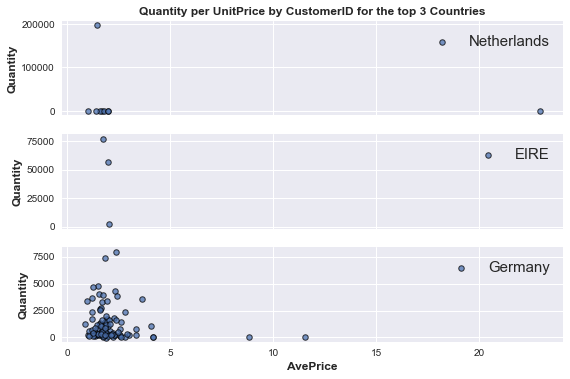

In [255]:
# chose plot stype
plt.style.use('seaborn')
## prepare data for plot
# filter of 3 countries
c1 = cal_result["Country"] == countries[0]
c2 = cal_result["Country"] == countries[1]
c3 = cal_result["Country"] == countries[2]
   
# apply filters to cal_result to pull out each country data
df_c1 = cal_result.loc[c1]
df_c2 = cal_result.loc[c2]
df_c3 = cal_result.loc[c3]

##data for scatter plot
# country 1
avg_price1 = df_c1["AvgPrice"]
qty1 = df_c1["Quantity"]

# country 2
avg_price2 = df_c2["AvgPrice"]
qty2 = df_c2["Quantity"]

# country 3
avg_price3 = df_c3["AvgPrice"]
qty3 = df_c3["Quantity"]

################################
###### plot code
# create 3 more x-axis for 3 plot in one fig
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 3, ncols = 1, sharex = True)

ax1.scatter(avg_price1, qty1, s = 30, 
            edgecolor = "black",  linewidth = 1, alpha = 0.75, label = countries[0])

ax2.scatter(avg_price2, qty2, s = 30,
            edgecolor = "black", linewidth = 1, alpha = 0.75, label = countries[1])

ax3.scatter(avg_price3, qty3, s = 30, 
            edgecolor = "black", linewidth = 1, alpha = 0.75, label = countries[2])

# labels
ax1.legend(fontsize = 15)
ax1.set_title('Quantity per UnitPrice by CustomerID for the top 3 Countries', fontsize = 12, fontweight = "bold")
# ax1.set_xlabel('AvePrice')
ax1.set_ylabel('Quantity',fontsize = 12, fontweight = "bold")

ax2.legend(fontsize = 15)
# ax2.set_xlabel('AvePrice')
ax2.set_ylabel('Quantity', fontsize = 12, fontweight = "bold")

ax3.legend(fontsize = 15)
ax3.set_xlabel('AvePrice', fontsize = 12, fontweight = "bold")
ax3.set_ylabel('Quantity', fontsize = 12, fontweight = "bold")



#plt.tight_layout()

plt.show()



#### Step 7.4 What to do now?
We aren't much better-off than what we started with. The data are still extremely scattered around and don't seem quite informative.

But we shouldn't despair!
There are two things to realize:
1) The data seem to be skewed towaards the axes (e.g. we don't have any values where Quantity = 50000 and AvgPrice = 5). So that might suggest a trend.
2) We have more data! We've only been looking at the data from 3 different countries and they are plotted on different graphs.

So: we should plot the data regardless of `Country` and hopefully see a less scattered graph.

##### Step 7.4.1 Plot the data for each `CustomerID` on a single graph

/var/folders/wg/n3_xmx_9117bptv0c99cb2d40000gp/T/ipykernel_37845/210232152.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cal_df["cry_id"][cry_names[num]] = num


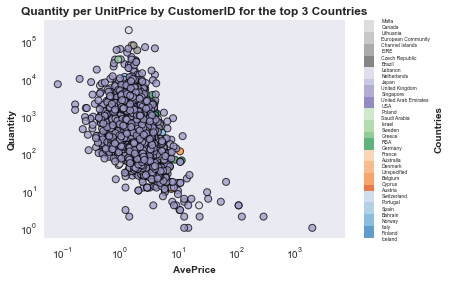

In [339]:
groups = online_rt.groupby(by = ["CustomerID", "Country"])
# sum the quantity and revenue for each customer, then revenue/quantity
cal_df = groups[["Quantity", "Revenue"]].sum().reset_index()
# drop 0 in quantity or Revenue
filt = (cal_df["Quantity"] != 0) & (cal_df["Revenue"] != 0)

cal_df = cal_df.loc[filt].reset_index(drop = True)



cal_df["AvgPrice"] = cal_df["Revenue"]/cal_df["Quantity"]

cry_names = cal_df["Country"].unique()
cry_id = np.arange(0,37)

#temporarily set index to a duplicate country column to fill in country code
cal_df["C"] = cal_df["Country"]
cal_df = cal_df.set_index("C")
cal_df["cry_id"] = np.nan
for num in cry_id:
    # for the row with the same country name in the cry_name
    # add num to the cry_id column
    cal_df["cry_id"][cry_names[num]] = num
#     print(num)
#     print(cry_names[num])
cal_df.reset_index(drop=True)

##data for scatter plot
ave_price = cal_df["AvgPrice"]
qty = cal_df["Quantity"]
country = cal_df["cry_id"]

###################################
## plot code
# c is color, set colors in a colormap using the country
# color map is tab20c, is a discrete map, 37 color
plt.scatter(ave_price, qty, c = country, cmap = plt.cm.get_cmap("tab20c",37),
           edgecolor = "black", linewidth = 1, alpha = 0.75)



#reference color bar:
# get rid of the warnning on autoremove grid
plt.rcParams['axes.grid'] = False
#set color bar
cbar = plt.colorbar()
cbar.set_label("Countries", size = 10, fontweight = "bold")
# set how many number to displace in color map bar
cbar.set_ticks(cry_id)
# set color map bar labels
cbar.set_ticklabels(cry_names)
# set color map bar label size
cbar.ax.tick_params(labelsize = 5)

# use log scale to make outliner less effective
plt.xscale("log")
plt.yscale("log")


plt.title('Quantity per UnitPrice by CustomerID for the top 3 Countries', fontsize = 12, fontweight = "bold")

plt.xlabel('AvePrice', fontsize = 10, fontweight = "bold")
plt.ylabel('Quantity', fontsize = 10, fontweight = "bold")

#plt.tight_layout()
plt.show()

    


##### Step 7.4.2 Zoom in so we can see that curve more clearly

In [ ]:
# it's in log scale, so pretty zoomed in

### 8. Plot a line chart showing revenue (y) per UnitPrice (x).

Did Step 7 give us any insights about the data? Sure! As average price increases, the quantity ordered decreses.  But that's hardly surprising. It would be surprising if that wasn't the case!

Nevertheless the rate of drop in quantity is so drastic, it makes me wonder how our revenue changes with respect to item price. It would not be that surprising if it didn't change that much. But it would be interesting to know whether most of our revenue comes from expensive or inexpensive items, and how that relation looks like.

That is what we are going to do now.

#### 8.1 Group `UnitPrice` by intervals of 1 for prices [0,50), and sum `Quantity` and `Revenue`.

In [347]:
# get group bins 
bins = np.arange(0, 50,1)
groups = online_rt.groupby(pd.cut(online_rt["UnitPrice"], bins))
uni_grps = groups[["Quantity", "Revenue"]].sum().reset_index()
uni_grps

,UnitPrice,Quantity,Revenue
0,"(0, 1]",2079045,1089068.414
1,"(1, 2]",1728270,2557511.340
2,"(2, 3]",735633,1803381.940
3,"(3, 4]",239161,849919.340
4,"(4, 5]",265225,1199346.770
5,"(5, 6]",66010,378927.900
6,"(6, 7]",39094,260446.410
7,"(7, 8]",38708,296541.690
8,"(8, 9]",44290,372452.180
9,"(9, 10]",16053,157629.560


#### 8.3 Plot.

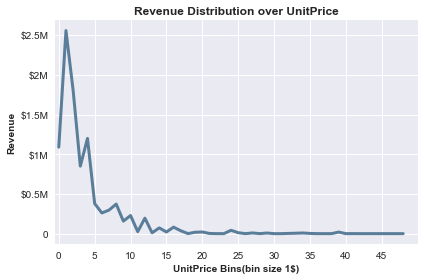

In [375]:
##plot
uni_grps["Revenue"].plot(linewidth = 3, color = "#5a7d9a")

# add title
plt.xlabel("UnitPrice Bins(bin size 1$)", fontsize = 10, fontweight = "bold")
plt.ylabel("Revenue", fontsize = 10, fontweight = "bold")
plt.title("Revenue Distribution over UnitPrice", fontsize = 12, fontweight = "bold")

#set labels on axis
x_labels = np.arange(0,50,5)
y_ticks = np.arange(0, 3000000, 500000)
y_labels = ["0", "$0.5M", "$1M","$1.5M", "$2M","$2.5M"]
#labels = x_labels
plt.xticks(ticks = x_labels )
plt.yticks(ticks = y_ticks, labels = y_labels)

# adding grid
plt.grid(True)

#zoom in
plt.xlim(-0.5,50) 


# padding plot to make it show better
plt.tight_layout()


plt.show()

#### 8.4 Make it look nicer.
x-axis needs values.  
y-axis isn't that easy to read; show in terms of millions.

In [ ]:
# already did in the last step

### BONUS: Create your own question and answer it.

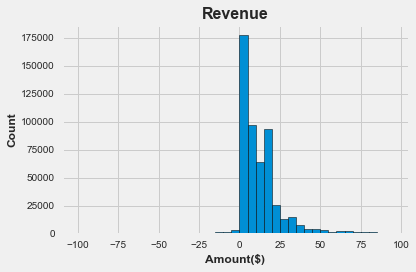

In [399]:
# Plot all the Revenue data with histogram 
plt.style.use('fivethirtyeight')

#plot data
revenue = online_rt["Revenue"] # order price
# find a rough range with bin2
bin1 = np.arange(-168470, 168470, 200)

# get a better range with most data fall in
bin2 = np.arange(-100, 100, 5)

#plot
plt.hist(revenue, bins = bin2, edgecolor = "black")

plt.title('Revenue', fontsize = 16, fontweight = "bold")
plt.xlabel('Amount($)',fontsize = 12, fontweight = "bold")
plt.ylabel('Count',fontsize = 12, fontweight = "bold")

#zoom in
#plt.xlim(-100,100) 

plt.tight_layout()

plt.show()
